# Getting Started

This notebook is to help new users get started with using the `pysplot` python package for spatiotemporal plotting.
We will run through examples of how to retrieve spatial and science data and combine it into an object that will be suitable for `pysplot` plotting.

In [1]:
## install if not present
### !pip install cdasws

In [ ]:
from sunpy.coordinates import GeocentricSolarEcliptic, GeocentricEarthEquatorial
from astropy.coordinates import ITRS
import astropy.units as u
from cdasws import CdasWs, TimeInterval
from cdasws.datarepresentation import DataRepresentation as dr

from pysplot.io.data import SpatialData, ScienceData, SpatialTimeData

## Step 1: Create SpatialData and ScienceData object

Here we will step through an example of splotting MMS data for one month.

#### SpatialData
SpatialData is an object containing information on the location of the spacecraft.
SpatialData expects data to be fed in with a dictionary where 'x' is a list of epochs in datetime format and 'y' contains the values.
If you use `pyspedas` to retrieve the data, the data will output in the correct format if the keyword `notplot=True`. Otherwise, you could read in the data however you like and make sure the input dictionary contains 'x' and 'y' in the same format. In this example, we use the `cdasws` package to stream data directly from CDAWeb. 

Splot data objects, like `SpatialData`, is designed work with `sunpy` and `astropy`, especially the coordinate frames and units. Though not required to initialize splot data with coordinate frames or units, it will make transforming between coordinates or unit quantities much easier.

In [3]:
cdas = CdasWs()
_, mms_mec_data = cdas.get_data("MMS1_MEC_SRVY_L2_EPHT89Q", ["mms1_mec_r_geo"], TimeInterval('2020-01-01', '2020-01-05'), dataRepresentation = dr.XARRAY)
spatial_data = {'x': mms_mec_data['Epoch'].values, 'y': mms_mec_data['mms1_mec_r_geo'].values}
spatial_data

{'x': array(['2020-01-01T00:00:00.000000000', '2020-01-01T00:00:30.000000000',
        '2020-01-01T00:01:00.000000000', ...,
        '2020-01-04T23:59:00.000000000', '2020-01-04T23:59:30.000000000',
        '2020-01-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 'y': array([[-103022.14797985,  -22630.7481424 ,    6293.65967293],
        [-103114.89881914,  -22439.35411279,    6286.36814742],
        [-103207.2737431 ,  -22247.65570303,    6279.07470234],
        ...,
        [-146106.8419048 ,  -55165.44524281,   -4892.73738136],
        [-146244.03003486,  -54869.43150151,   -4900.51379811],
        [-146380.60842783,  -54573.07637966,   -4908.28976271]])}

In [4]:
spatial_data_obj = SpatialData(spatial_data, coord=ITRS, units=u.km, spatial_columns_names=['x_r_geo', 'y_r_geo', 'z_r_geo'], coord_kwargs={'representation_type':'cartesian'})
print(spatial_data_obj.data.head(10))
print('coordinates', spatial_data_obj.coord)
print('units', spatial_data_obj.units)

                           x_r_geo       y_r_geo      z_r_geo
2020-01-01 00:00:00 -103022.147980 -22630.748142  6293.659673
2020-01-01 00:00:30 -103114.898819 -22439.354113  6286.368147
2020-01-01 00:01:00 -103207.273743 -22247.655703  6279.074702
2020-01-01 00:01:30 -103299.271825 -22055.653658  6271.779326
2020-01-01 00:02:00 -103390.892258 -21863.348797  6264.482051
2020-01-01 00:02:30 -103482.134260 -21670.741971  6257.182879
2020-01-01 00:03:00 -103572.996908 -21477.833917  6249.881817
2020-01-01 00:03:30 -103663.479339 -21284.625433  6242.578875
2020-01-01 00:04:00 -103753.580509 -21091.117304  6235.274052
2020-01-01 00:04:30 -103843.299833 -20897.310501  6227.967312
coordinates <class 'astropy.coordinates.builtin_frames.itrs.ITRS'>
units km


#### Science Data

Most of the time, you also want to consider some scientific data to go along with the spatial data for plotting. Here's how you would initialize the `ScienceData` object, similar to `SpatialData`.

We'll pull magnetic field from the MMS FGM instrument for the same time period and initialize our `ScienceData` object.

In [5]:
_, mms_fgm_data = cdas.get_data("MMS1_FGM_SRVY_L2", ["mms1_fgm_b_gse_srvy_l2"], TimeInterval('2020-01-01', '2020-01-05'), dataRepresentation = dr.XARRAY)
science_data = {'x': mms_fgm_data['Epoch'].values, 'y':mms_fgm_data['mms1_fgm_b_gse_srvy_l2'].values}
science_data


{'x': array(['2020-01-01T00:00:00.023849411', '2020-01-01T00:00:00.086350301',
        '2020-01-01T00:00:00.148851190', ...,
        '2020-01-04T23:59:59.644811973', '2020-01-04T23:59:59.769813750',
        '2020-01-04T23:59:59.894815527'], dtype='datetime64[ns]'),
 'y': array([[  1.2351352 ,  15.014284  , -18.71197   ,  24.02274   ],
        [  1.1890574 ,  14.771348  , -18.227575  ,  23.49151   ],
        [  1.0073503 ,  14.434054  , -17.547987  ,  22.743977  ],
        ...,
        [  2.5222871 ,  -8.7770815 ,  -0.60825026,   9.152543  ],
        [  2.523703  ,  -8.787683  ,  -0.6247372 ,   9.164209  ],
        [  2.5143878 ,  -8.772815  ,  -0.6341995 ,   9.14804   ]],
       dtype=float32)}

In [6]:
science_data_obj = ScienceData(science_data, units=1e-9*u.T, science_columns_names=['Bx_GSE', 'By_GSE', 'Bz_GSE', 'Bt'])
print(science_data_obj.data.head(10))
print('units', science_data_obj.units)

                                 Bx_GSE     By_GSE     Bz_GSE         Bt
2020-01-01 00:00:00.023849411  1.235135  15.014284 -18.711969  24.022739
2020-01-01 00:00:00.086350301  1.189057  14.771348 -18.227575  23.491510
2020-01-01 00:00:00.148851190  1.007350  14.434054 -17.547987  22.743977
2020-01-01 00:00:00.211352080  0.796693  14.379056 -17.011660  22.288754
2020-01-01 00:00:00.273852969  0.971681  14.440439 -16.555071  21.989561
2020-01-01 00:00:00.336353859  1.298611  14.549273 -15.875175  21.572874
2020-01-01 00:00:00.398854748  1.292696  14.098995 -16.087919  21.430676
2020-01-01 00:00:00.461355638  1.083263  14.143856 -16.240618  21.563391
2020-01-01 00:00:00.523856527  1.394914  14.089476 -17.809347  22.751526
2020-01-01 00:00:00.586357416  1.861095  13.564971 -18.790823  23.250099
units 1e-09 T


#### Create the combined data object, `SpatialTimeData`

Now that you have both `SpatialData` and `ScienceData` initialized, you can combine them into an object for splotting (`SpatialTimeData`).

The spatial data was in GEO coordinates; however the science data was pulled in GSE coordinates. To rectify that, we can convert the spatial data to GSE to match the science data by with the `desired_coord` argument.

During the intialization of `SpatialTimeData`, you can also specify the data cadence to match the temporal cadence of the spatial and science data objects. If specified, the data will be resampled and combined with the specified `data_cadence` and `combine_method`. If `data_cadence` is not specified, the combined data will take on the temporal cadence of the science data and the spatial data will be interpolated to match. 


In [7]:
splot_data_obj = SpatialTimeData(spatial_data_obj, science=science_data_obj, desired_science_units=1e-9*u.T, desired_coord=GeocentricSolarEcliptic, desired_coord_kwargs={'representation_type':'cartesian'}, data_cadence='1min')
print(splot_data_obj.data.head(10))
print('splot spatial columns', splot_data_obj.spatial_columns)
print('splot coord', splot_data_obj.coord)
print('splot science columns', splot_data_obj.science_columns)
print('splot units', splot_data_obj.science_units)

/Users/mow1/projects/pysplot/whpitest/lib/python3.9/site-packages/pysplot/io/data_helpers.py:463: FutureWarning: The provided callable <function nanmean at 0x7f87101d44c0> is currently using DatetimeIndexResampler.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  merged_data = merged_data.resample(data_cadence).apply(combine_method_function)


                                x             y             z    Bx_GSE  \
2020-01-01 00:00:00  92619.877167  24673.647720  44534.181641 -2.423322   
2020-01-01 00:01:00  92706.571254  24740.953417  44550.000876 -3.717061   
2020-01-01 00:02:00  92793.154582  24808.226995  44565.766032 -3.018241   
2020-01-01 00:03:00  92879.627570  24875.468497  44581.477378 -3.549953   
2020-01-01 00:04:00  92965.990168  24942.677820  44597.134929 -3.162446   
2020-01-01 00:05:00  93052.242819  25009.855177  44612.738866 -3.241481   
2020-01-01 00:06:00  93138.385557  25077.000120  44628.289283 -3.004963   
2020-01-01 00:07:00  93224.418665  25144.113335  44643.786297 -2.934352   
2020-01-01 00:08:00  93310.342298  25211.194447  44659.230078 -2.928509   
2020-01-01 00:09:00  93396.156677  25278.243521  44674.620706 -2.828686   

                       By_GSE    Bz_GSE         Bt  
2020-01-01 00:00:00  6.699257 -4.964180  12.644825  
2020-01-01 00:01:00  7.469730 -0.458758  11.803510  
2020-01-01 00:0

## Step 2: Spatiotemporal plotting using the SpatialTimeData object

Now that the splot object is created, it contains a combined dataframe of spatial coordinates, in the requested spatial coordinate frame and units, and scientific values, in the requested units, presented on a matched, standardized cadence. This merged dataframe we can use to plot on a spatial and temporal regime.

In [8]:
from pysplot.plots.plottypes import orbit_plot, spatial_value_plot

In [9]:
# create additional science 

dat = splot_data_obj.data
R_E = 6378 #km
for col in splot_data_obj.spatial_columns:
    dat[f'r_{col}'] = dat[col]/R_E
dat['radius'] = (dat['r_x']**2 + dat['r_y']**2 + dat['r_z']**2)**.5

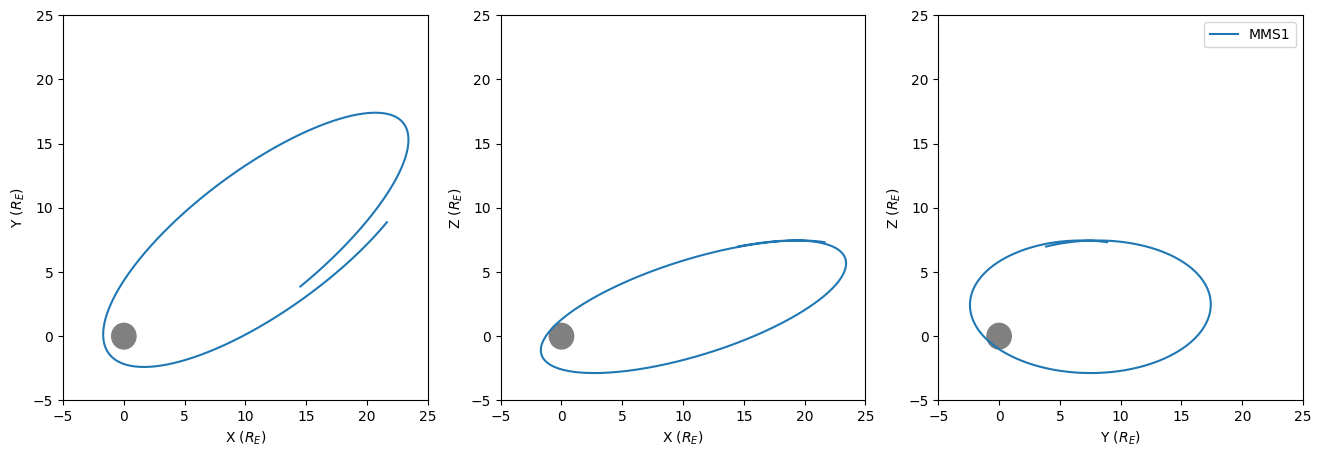

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
xy_ax = ax[0]
orbit_plot(splot_data_obj.data, xy_ax, 'r_x', 'r_y')
xy_ax.set_xlabel('X ($R_E$)')
xy_ax.set_ylabel('Y ($R_E$)')
xz_ax = ax[1]
orbit_plot(splot_data_obj.data, xz_ax, 'r_x', 'r_z')
xz_ax.set_xlabel('X ($R_E$)')
xz_ax.set_ylabel('Z ($R_E$)')
yz_ax = ax[2]
orbit_plot(splot_data_obj.data, yz_ax, 'r_y', 'r_z', plotting_kwargs={'label': 'MMS1'})
yz_ax.legend()
yz_ax.set_xlabel('Y ($R_E$)')
yz_ax.set_ylabel('Z ($R_E$)')

for axes in ax:
    axes.set_xlim(-5,25)
    axes.set_ylim(-5,25)
    circ = plt.Circle((0,0), 1, color='0.5')
    axes.add_patch(circ)


(0.0, 5000.0)

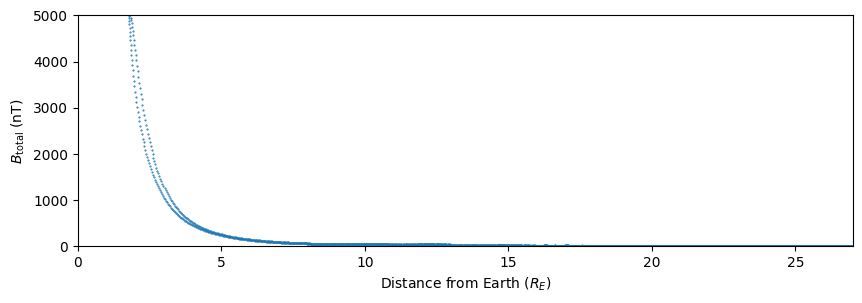

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3))
spatial_value_plot(splot_data_obj.data, ax, 'radius', 'Bt', plotting_kwargs={'marker':'.', 'ms':1, 'ls': 'None'})
ax.set_xlabel('Distance from Earth ($R_E$)')
ax.set_ylabel('$B_\mathrm{total}$ (nT)')
ax.set_xlim(0,27)
ax.set_ylim(0,5000)

#### Transform from one coordinate frame to another

Since we used sunpy coordinate system to define the splot data spatial frame, we can use the underlying functionality of sunpy to transform the spatial coordinate from one frame to another. For example, we are currently in GeocentricSolarEcliptic with coordinate units in km, but we can transform the splot merged data to be presented in Geocentric Earth Equatorial (`GeocentricEarthEquatorial`) frame with lat/lon in degrees and distance in AU. Note that sunpy coordinate transformations can be very timely if the observing time is required to calculate the location of the Sun and Earth.

In [ ]:
splot_data_obj.transform_coord(GeocentricEarthEquatorial, desired_units=[u.deg, u.deg, u.AU], desired_coord_kwargs={'representation_type':'spherical'})
print('new coord:', splot_data_obj.coord)
splot_data_obj.data.head(10)


new coord: <class 'sunpy.coordinates.frames.GeocentricEarthEquatorial'>


,lon,lat,distance,Bx_GSE,By_GSE,Bz_GSE,Bt,r_x,r_y,r_z,radius
2020-01-01 00:00:00,-67.727862,3.370016,0.000706,-2.423322,6.699257,-4.964180,12.644825,14.521774,3.868556,6.982468,16.571135
2020-01-01 00:01:00,-67.701825,3.358879,0.000707,-3.717061,7.469730,-0.458758,11.803510,14.535367,3.879108,6.984948,16.586557
2020-01-01 00:02:00,-67.675837,3.347763,0.000708,-3.018241,3.933112,-0.648176,5.324870,14.548942,3.889656,6.987420,16.601963
2020-01-01 00:03:00,-67.649897,3.336666,0.000708,-3.549953,3.360010,-0.602684,5.059439,14.562500,3.900199,6.989884,16.617354
2020-01-01 00:04:00,-67.624006,3.325589,0.000709,-3.162446,2.958352,-1.157979,4.654480,14.576041,3.910737,6.992338,16.632728
2020-01-01 00:05:00,-67.598164,3.314532,0.000710,-3.241481,3.352660,-1.197061,4.923051,14.589565,3.921269,6.994785,16.648086
2020-01-01 00:06:00,-67.572369,3.303495,0.000710,-3.004963,3.118262,-0.875835,4.448194,14.603071,3.931797,6.997223,16.663428
2020-01-01 00:07:00,-67.546623,3.292477,0.000711,-2.934352,3.102699,-0.866001,4.391159,14.616560,3.942319,6.999653,16.678754
2020-01-01 00:08:00,-67.520924,3.281479,0.000712,-2.928509,2.907647,-0.997075,4.273842,14.630032,3.952837,7.002074,16.694065
2020-01-01 00:09:00,-67.495273,3.270500,0.000712,-2.828686,2.976753,-1.100050,4.278191,14.643486,3.963350,7.004487,16.709359
